In [2]:
import pandas as pd
import numpy as np
import matplotlib
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
pd.option_context('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt

In [3]:
train_tr=pd.read_csv(r"D:\DA_competition\DC\data\transaction_train.csv")
train_tag=pd.read_csv(r"D:\DA_competition\DC\data\tag_train.csv")
train_tr=pd.merge(train_tr,train_tag,on="UID",how="left")
train_tr=train_tr.drop_duplicates()

In [14]:
#交易表
train_tr_info=pd.DataFrame()
train_tr_info["样本数"]=train_tr.apply(lambda x:len(x),axis=0)
train_tr_info["空值数"]=train_tr.apply(lambda x:len(x[x.isnull()]),axis=0)
train_tr_info["空值占比"]=train_tr_info["空值数"]/len(train_tr)

train_tr_info["0的个数"]=train_tr[train_tr["Tag"]==0].apply(lambda x:len(x),axis=0)
train_tr_info["0的空值数"]=train_tr[train_tr["Tag"]==0].apply(lambda x:len(x[x.isnull()]),axis=0)
train_tr_info["0空值占比"]=train_tr_info["0的空值数"]/len(train_tr[train_tr["Tag"]==0])

train_tr_info["1的个数"]=train_tr[train_tr["Tag"]==1].apply(lambda x:len(x),axis=0)
train_tr_info["1的空值数"]=train_tr[train_tr["Tag"]==1].apply(lambda x:len(x[x.isnull()]),axis=0)
train_tr_info["1空值占比"]=train_tr_info["1的空值数"]/len(train_tr[train_tr["Tag"]==1])

train_tr_info["属性值类别数"]=train_tr.apply(lambda x:len(x.value_counts()),axis=0)
train_tr_info["0的属性值类别数"]=train_tr[train_tr["Tag"]==0].apply(lambda x:len(x.value_counts()),axis=0)
train_tr_info["1的属性值类别数"]=train_tr[train_tr["Tag"]==1].apply(lambda x:len(x.value_counts()),axis=0)

In [15]:
train_tr_info

,样本数,空值数,空值占比,0的个数,0的空值数,0空值占比,1的个数,1的空值数,1空值占比,属性值类别数,0的属性值类别数,1的属性值类别数
UID,264622,0,0.000000,219662,0,0.000000,44960,0,0.000000,30542,26549,3993
channel,264622,0,0.000000,219662,0,0.000000,44960,0,0.000000,5,4,4
day,264622,0,0.000000,219662,0,0.000000,44960,0,0.000000,30,30,30
time,264622,0,0.000000,219662,0,0.000000,44960,0,0.000000,60075,56921,25136
trans_amt,264622,0,0.000000,219662,0,0.000000,44960,0,0.000000,11225,10868,1897
amt_src1,264622,0,0.000000,219662,0,0.000000,44960,0,0.000000,28,27,18
merchant,264622,0,0.000000,219662,0,0.000000,44960,0,0.000000,19766,16950,3628
code1,264622,239767,0.906074,219662,208237,0.947988,44960,31530,0.701290,6101,2019,4142
code2,264622,261403,0.987835,219662,216525,0.985719,44960,44878,0.998176,668,652,17
trans_type1,264622,0,0.000000,219662,0,0.000000,44960,0,0.000000,15,15,11


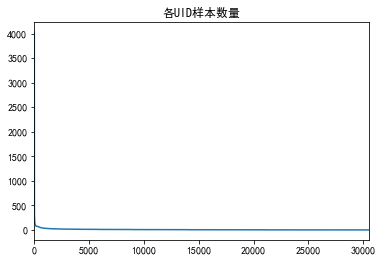

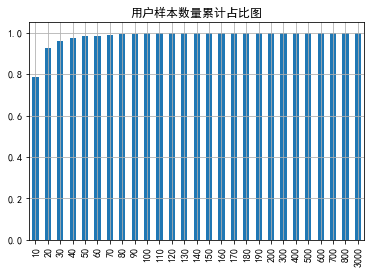

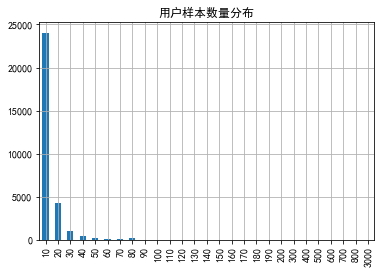

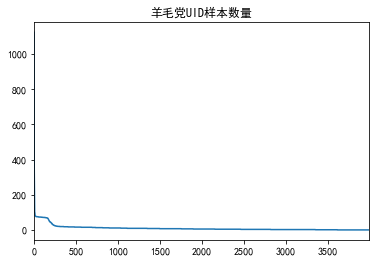

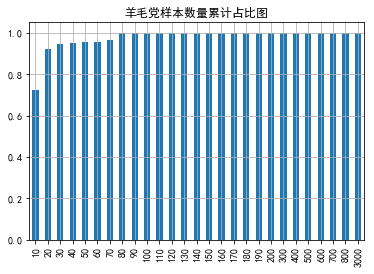

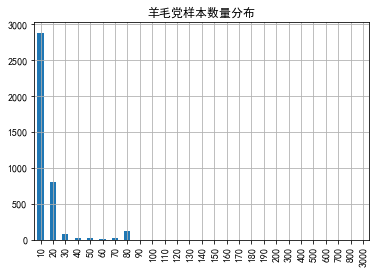

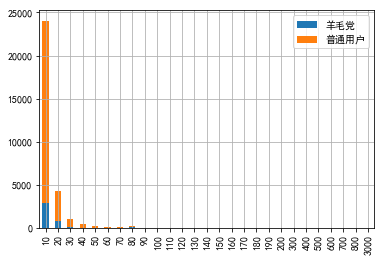

In [5]:
#UID
vc=train_tr.UID.value_counts()
vc.reset_index(drop=True).plot(title="各UID样本数量")
plt.show()

#统计一下分布在各个数量段内的用户数
index=list(range(10,201,10))
index.extend(list(range(300,801,100)))
index.append(3000)
values=[len(vc[vc.values<=x]) for x in index]

values_sum=pd.Series(values,index=index)/len(vc)
values_sum.plot(title="用户样本数量累计占比图",kind='bar',grid=True)
plt.show()
for i in range(len(values)-1,0,-1):
    values[i]=values[i]-values[i-1]
vc_an=pd.Series(values,index=[str(x) for x in index])
vc_an.plot(title="用户样本数量分布",kind='bar',grid=True)
plt.show()

#用户样本数量分布羊毛党占比
values_1=[]
vc_1=train_tr[train_tr.Tag==1].UID.value_counts()
vc_1.reset_index(drop=True).plot(title="羊毛党UID样本数量")
plt.show()

values_1=[len(vc_1[vc_1.values<=x]) for x in index]
values_sum_1=pd.Series(values_1,index=index)/len(vc_1)
values_sum_1.plot(title="羊毛党样本数量累计占比图",kind='bar',grid=True)
plt.show()

for i in range(len(values_1)-1,0,-1):
    values_1[i]=values_1[i]-values_1[i-1]
vc_an_1=pd.Series(values_1,index=[str(x) for x in index])
vc_an_1.plot(title="羊毛党样本数量分布",kind='bar',grid=True)
plt.show()

vc_ratio=pd.concat([vc_an_1,vc_an],axis=1)
vc_ratio.columns=["羊毛党","普通用户"]
vc_ratio["普通用户"]=vc_ratio["普通用户"]-vc_ratio["羊毛党"]
vc_ratio.plot(kind='bar',stacked=True,grid=True)
plt.show()

In [6]:
print("全部用户的样本数量描述：\n",vc.describe())
print("羊毛党用户的样本数量描述:\n",vc_1.describe())
print("全部用户的样本数量中位数：\n",vc.median())
print("羊毛党用户的样本数量中位数：\n",vc_1.median())


全部用户的样本数量描述：
 count    30542.000000
mean         8.665248
std         29.025866
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max       4030.000000
Name: UID, dtype: float64
羊毛党用户的样本数量描述:
 count    3993.000000
mean       11.265214
std        25.508487
min         1.000000
25%         3.000000
50%         6.000000
75%        12.000000
max      1124.000000
Name: UID, dtype: float64
全部用户的样本数量中位数：
 5.0
羊毛党用户的样本数量中位数：
 6.0


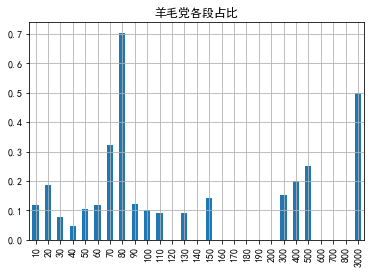

In [7]:
y_ratio=vc_an_1/vc_an
y_ratio.plot(kind='bar',grid=True,title="羊毛党各段占比")
plt.show()

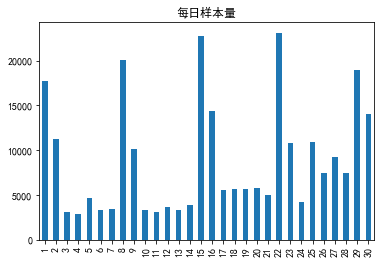

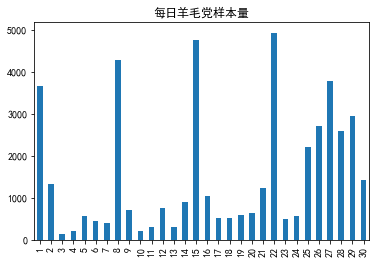

全部用户活跃日期分布方差均值： 18.28056528729576
0用户活跃日期分布方差均值： 18.49116867515566
羊毛党活跃日期分布方差均值： 16.880287465034183


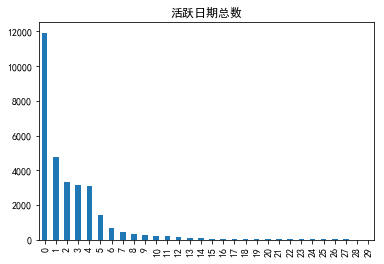

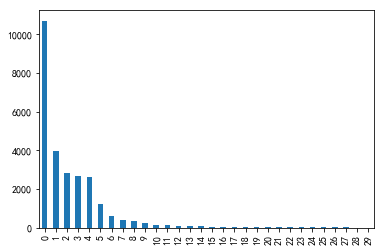

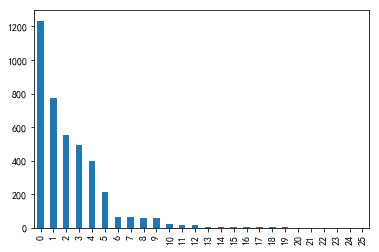

In [8]:
#day
train_tr.day.value_counts().sort_index().plot(kind='bar',title="每日样本量")
plt.show()
train_tr[train_tr.Tag==1].day.value_counts().sort_index().plot(kind='bar',title="每日羊毛党样本量")
plt.show()
#1、8、15、22、29为周六
#2、9、16、23、30为周日
#其余为周一至周五
day_unique_all=train_tr.groupby("UID").day.unique()
day_unique_1=train_tr[train_tr.Tag==1].groupby("UID").day.unique()
day_unique_0=train_tr[train_tr.Tag==0].groupby("UID").day.unique()

print("全部用户活跃日期分布方差均值：",day_unique_all.apply(lambda x:x.mean()).mean())
print("0用户活跃日期分布方差均值：",day_unique_0.apply(lambda x:x.mean()).mean())
print("羊毛党活跃日期分布方差均值：",day_unique_1.apply(lambda x:x.mean()).mean())
day_unique_all.apply(lambda x:len(x)).value_counts().plot(kind='bar',use_index=False,title="活跃日期总数")
plt.show()
day_unique_0.apply(lambda x:len(x)).value_counts().plot(kind='bar',use_index=False)
plt.show()
day_unique_1.apply(lambda x:len(x)).value_counts().plot(kind='bar',use_index=False)
plt.show()

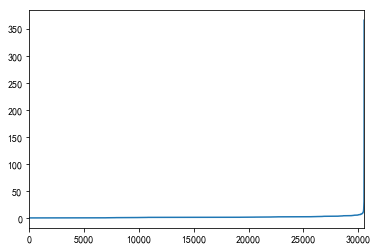

2.3806057605831907


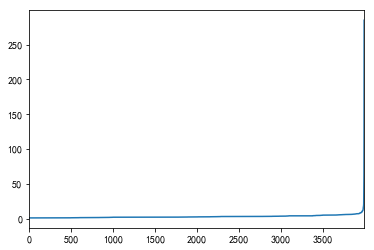

2.9835422084448786


In [9]:
#每个id平均每天的活跃次数
(vc.sort_index()/day_unique_all.apply(lambda x:len(x))).sort_values().plot(use_index=False)
plt.show()
print((vc.sort_index()/day_unique_all.apply(lambda x:len(x))).mean())
(vc_1.sort_index()/day_unique_1.apply(lambda x:len(x))).sort_values().plot(use_index=False)
plt.show()
print((vc_1.sort_index()/day_unique_1.apply(lambda x:len(x))).mean())

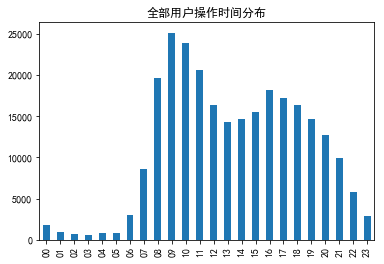

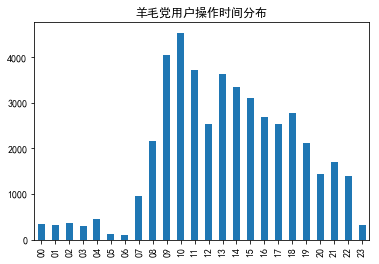

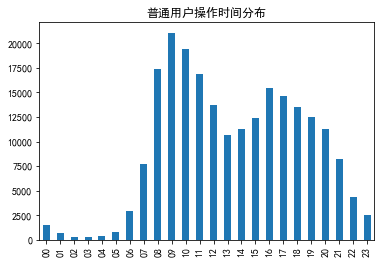

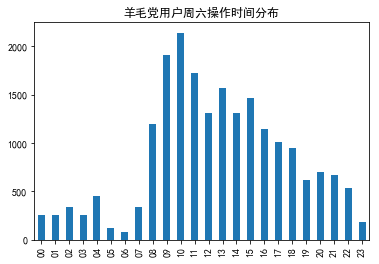

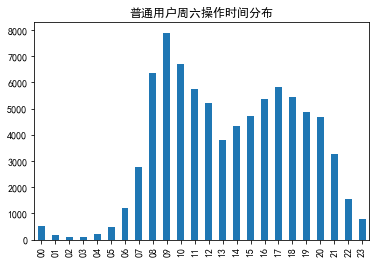

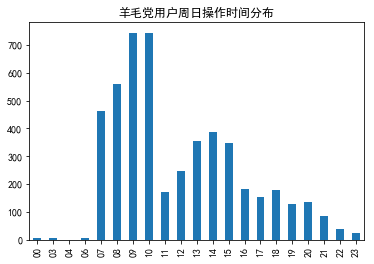

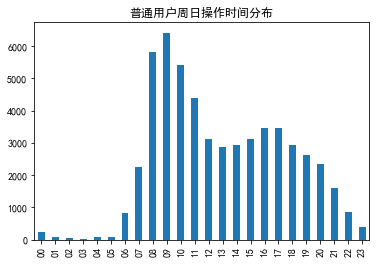

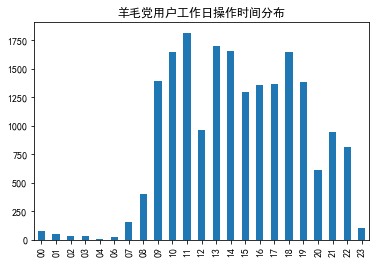

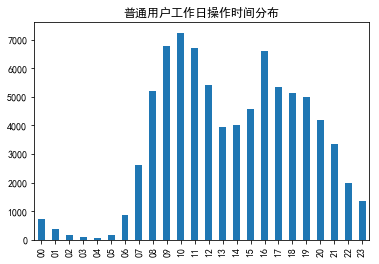

In [10]:
#操作时间点time
import datetime as dt
train_tr["hour"]=train_tr.time.apply(lambda x:x.split(":")[0])
train_tr["hour"].value_counts().sort_index().plot(kind='bar',title="全部用户操作时间分布")
plt.show()
train_tr[train_tr.Tag==1]["hour"].value_counts().sort_index().plot(kind='bar',title="羊毛党用户操作时间分布")
plt.show()
train_tr[train_tr.Tag==0]["hour"].value_counts().sort_index().plot(kind='bar',title="普通用户操作时间分布")
plt.show()
#查看羊毛党周六周日和普通用户周六周日有什么区别
#1、8、15、22、29为周六
#2、9、16、23、30为周日
train_tr[(train_tr.Tag==1)&(train_tr.day.isin([1,8,15,22,29]))]["hour"].value_counts().sort_index().plot(kind='bar',title="羊毛党用户周六操作时间分布")
plt.show()
train_tr[(train_tr.Tag==0)&(train_tr.day.isin([1,8,15,22,29]))]["hour"].value_counts().sort_index().plot(kind='bar',title="普通用户周六操作时间分布")
plt.show()
train_tr[(train_tr.Tag==1)&(train_tr.day.isin([2,9,16,23,30]))]["hour"].value_counts().sort_index().plot(kind='bar',title="羊毛党用户周日操作时间分布")
plt.show()
train_tr[(train_tr.Tag==0)&(train_tr.day.isin([2,9,16,23,30]))]["hour"].value_counts().sort_index().plot(kind='bar',title="普通用户周日操作时间分布")
plt.show()
train_tr[(train_tr.Tag==1)&(~train_tr.day.isin([1,8,15,22,29,2,9,16,23,30]))]["hour"].value_counts().sort_index().plot(kind='bar',title="羊毛党用户工作日操作时间分布")
plt.show()
train_tr[(train_tr.Tag==0)&(~train_tr.day.isin([1,8,15,22,29,2,9,16,23,30]))]["hour"].value_counts().sort_index().plot(kind='bar',title="普通用户工作日操作时间分布")
plt.show()

In [11]:
print(train_tr[train_tr.Tag==1].trans_amt.describe().apply(lambda x:'%.3f' % x))
print(train_tr[train_tr.Tag==0].trans_amt.describe().apply(lambda x:'%.3f' % x))


count      44982.000
mean        8390.237
std        65928.749
min          102.000
25%          102.000
50%         2736.000
75%         2818.000
max      2990210.000
Name: trans_amt, dtype: object
count       219672.000
mean         38697.181
std         531679.839
min            102.000
25%           1459.000
50%           2818.000
75%           5264.000
max      111069095.000
Name: trans_amt, dtype: object


In [5]:
def discrete_field(name):
    data=train_tr[["UID",name,"Tag"]].drop_duplicates().fillna(0)
    data[name]=data[name].apply(lambda x:str(x))
    data[data.Tag==0][name].value_counts().sort_index().plot(kind='bar',title="普通用户"+name+"属性值-用户数量分布图",grid=True)
    plt.show()
    data[data.Tag==1][name].value_counts().sort_index().plot(kind='bar',title="羊毛党"+name+"属性值-用户数量分布图",grid=True)
    plt.show()
    data[data.Tag==0].groupby("UID")[name].unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',title="普通用户对应"+name+"属性种类数-用户数量分布图",grid=True)
    plt.show()
    data[data.Tag==1].groupby("UID")[name].unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',title="羊毛党对应"+name+"属性种类数-用户数量分布图",grid=True)
    plt.show()
    

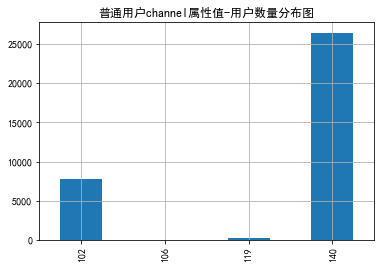

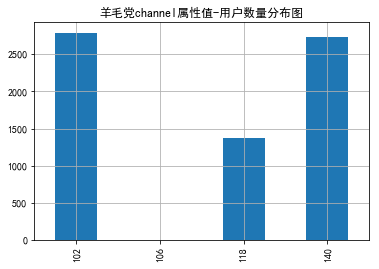

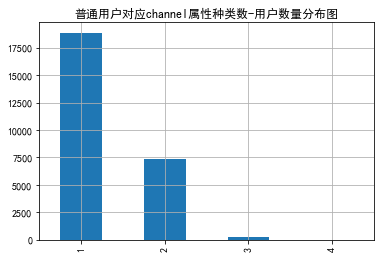

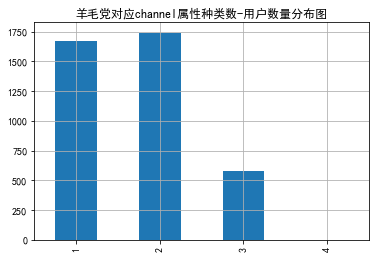

In [21]:
discrete_field("channel")
#普通用户有119平台，羊毛党没有
#羊毛党用户有118平台，普通用户没有
#羊毛党平台同一个用户有两种平台的占比要大一些

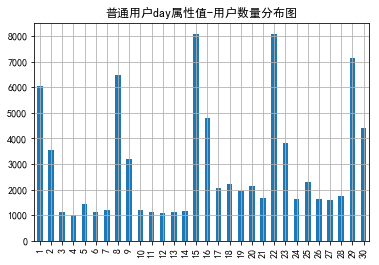

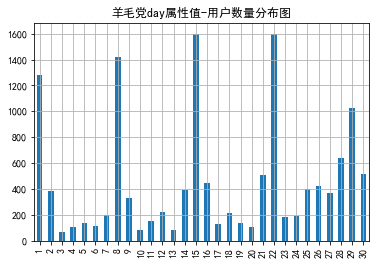

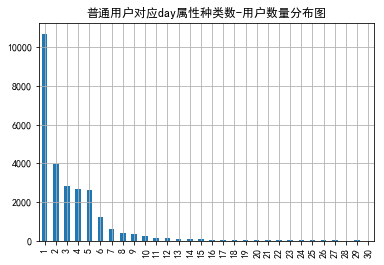

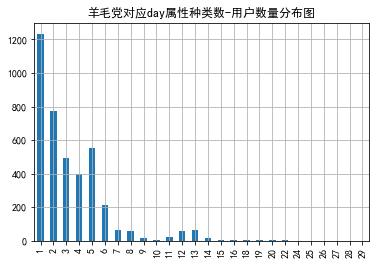

In [22]:
discrete_field("day")

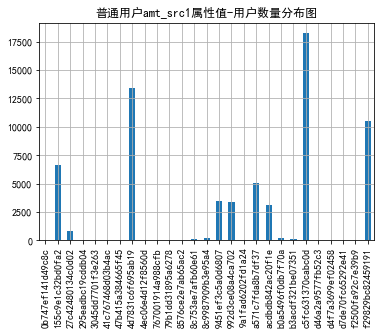

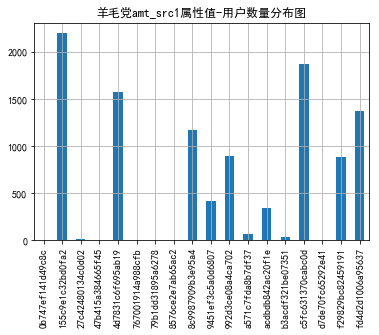

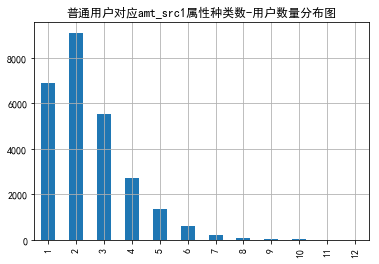

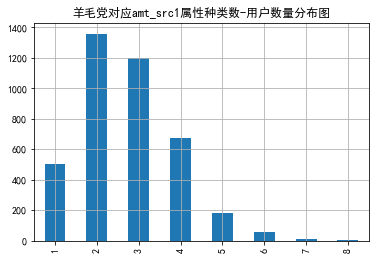

In [23]:
discrete_field("amt_src1")

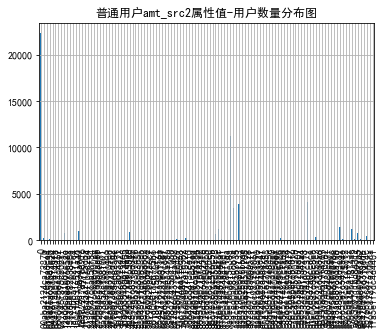

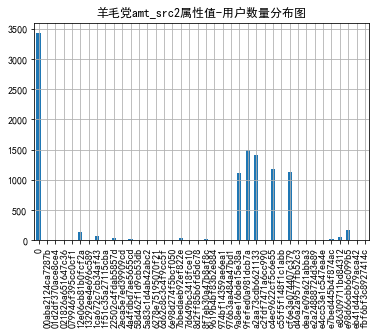

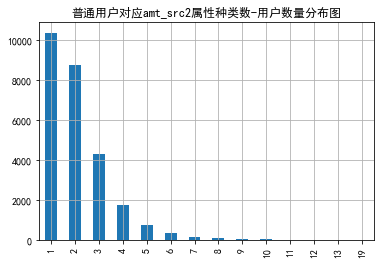

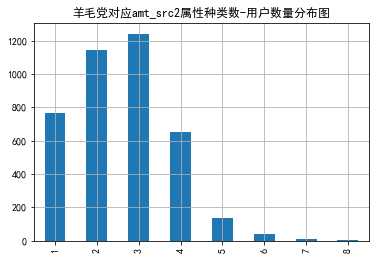

In [26]:
discrete_field("amt_src2")

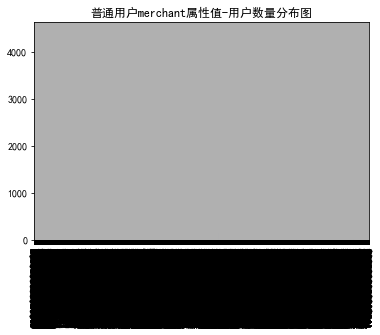

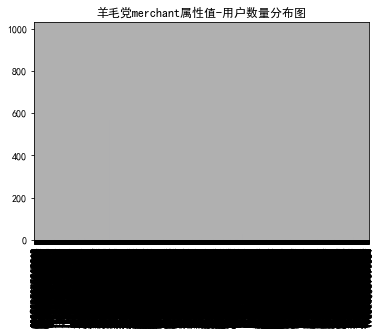

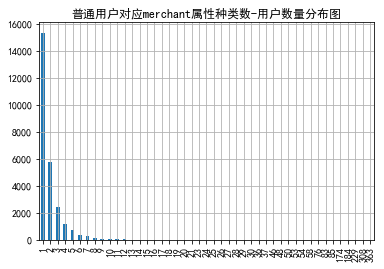

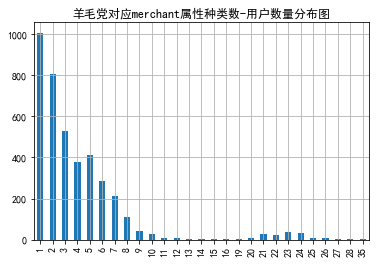

In [41]:
discrete_field("merchant")

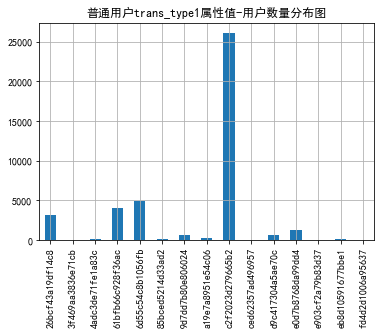

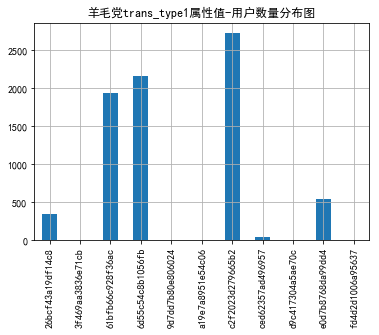

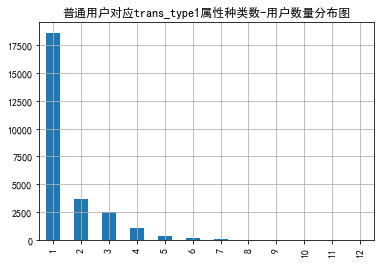

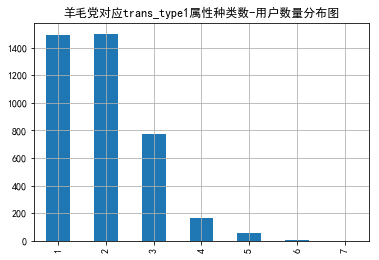

In [28]:
discrete_field("trans_type1")

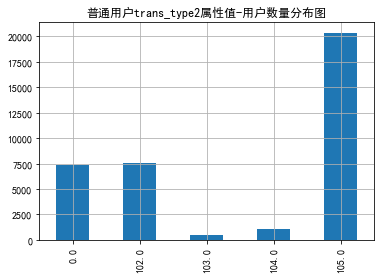

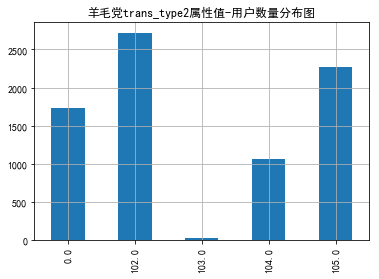

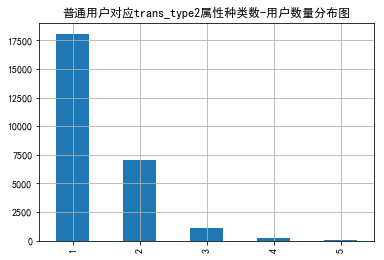

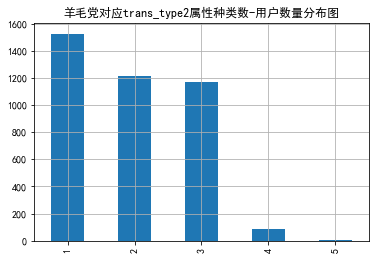

In [29]:
discrete_field("trans_type2")

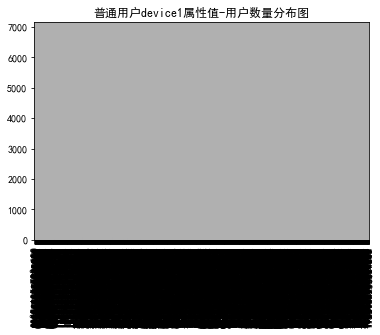

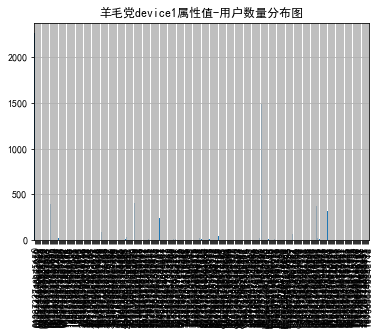

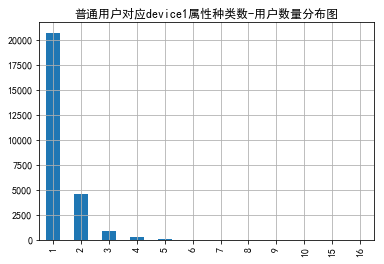

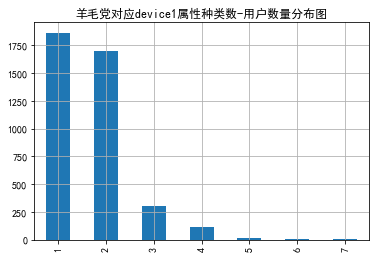

In [30]:
discrete_field("device1")

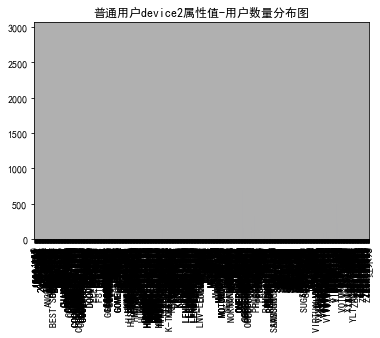

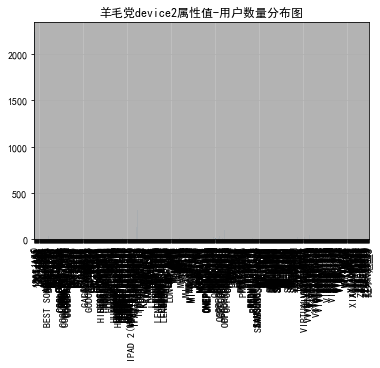

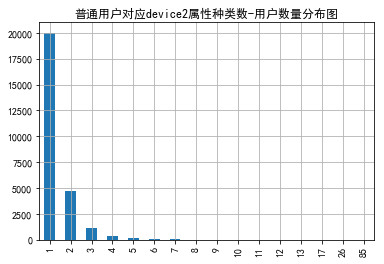

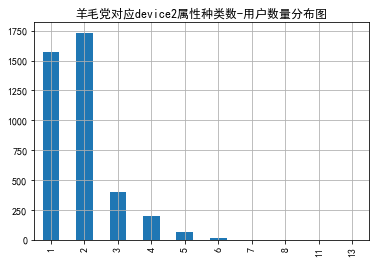

In [31]:
discrete_field("device2")

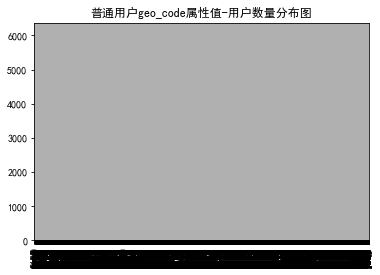

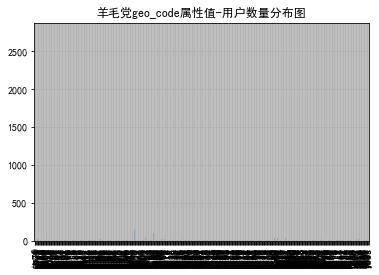

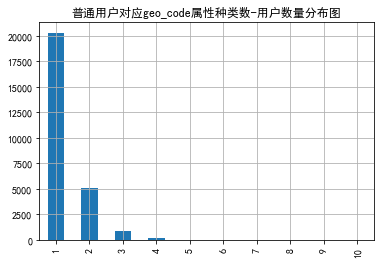

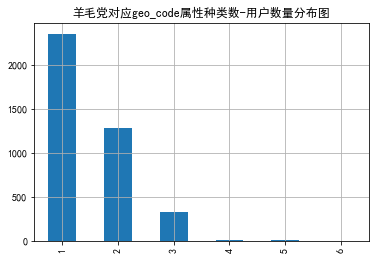

In [33]:
discrete_field("geo_code")

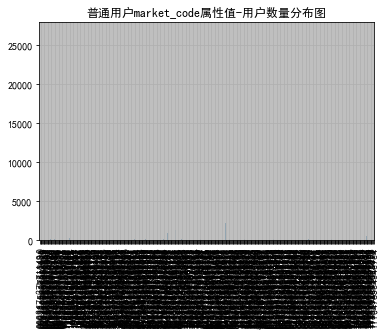

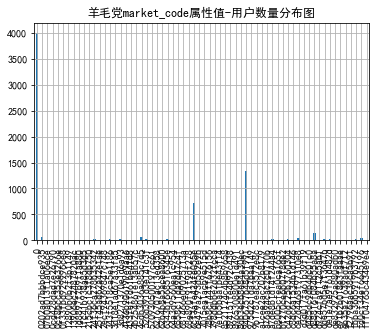

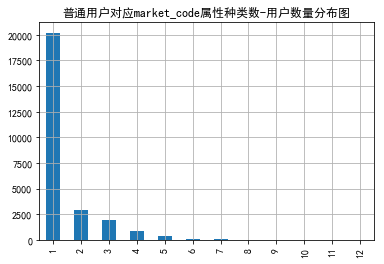

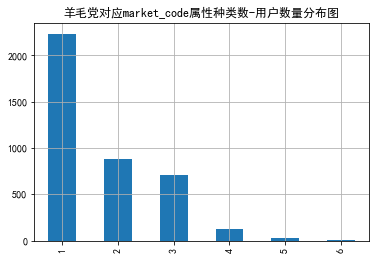

In [34]:
discrete_field("market_code")

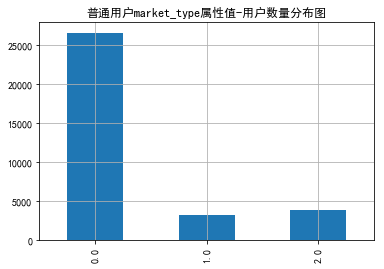

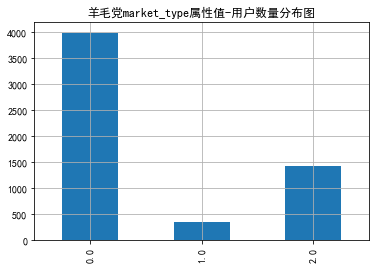

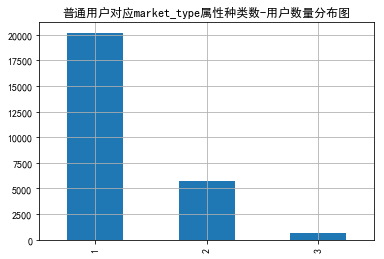

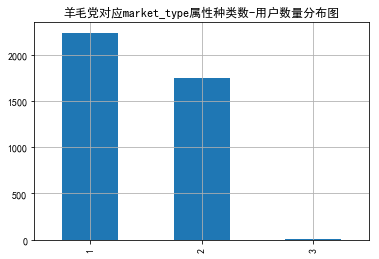

In [40]:
discrete_field("market_type")

In [4]:
#一种特征就是属性值之间的差异


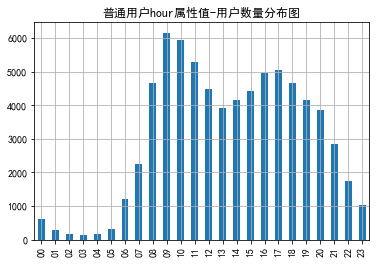

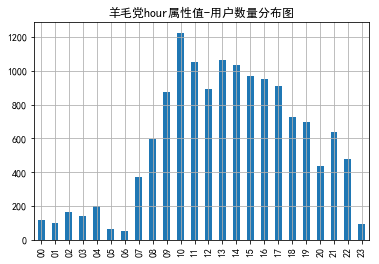

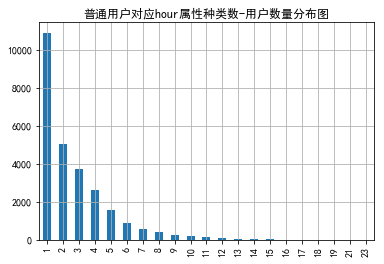

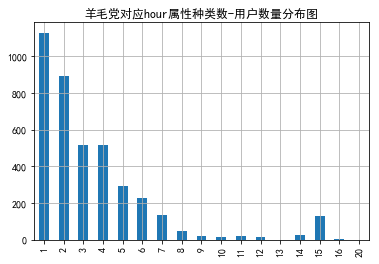

In [16]:
#time
train_tr["hour"]=train_tr.time.apply(lambda x:x.split(":")[0])
discrete_field("hour")

In [36]:
def one_one(name):
    data=train_tr[["UID",name,"Tag"]].drop_duplicates()
    data[data.Tag==0].groupby("UID")[name].unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',title="普通用户对应"+name+"属性种类数-用户数量分布图",grid=True)
    plt.show()
    data[data.Tag==1].groupby("UID")[name].unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',title="羊毛党对应"+name+"属性种类数-用户数量分布图",grid=True)
    plt.show()
    ratio=pd.DataFrame(data[name].value_counts())
    ratio=ratio.merge(pd.DataFrame(data.groupby(name).Tag.apply(lambda x:len(x[x==1])/len(x))),how="left",left_index=True,right_index=True)
    ratio.columns=["用户数量","羊毛党用户占比"]
    ratio.groupby("用户数量")["羊毛党用户占比"].mean().plot(title=name+"用户数量和羊毛党占比统计图",grid=True,kind='bar')
#     plt.plot(ratio.iloc[:,0],ratio.iloc[:,1])
#     plt.title(name+"用户数量和羊毛党占比统计图")
    plt.show()
    print(ratio)

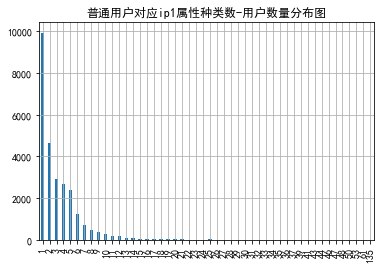

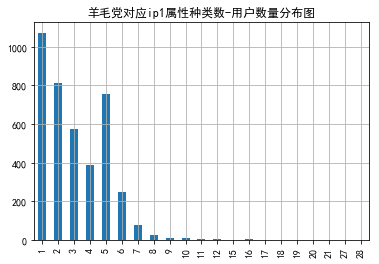

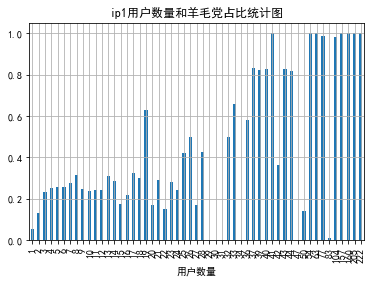

                  用户数量   羊毛党用户占比
99533c7d37963762   222  1.000000
329ad082dc996703   205  1.000000
8cc731ce206a9c63   160  1.000000
8f10d8efe9372319   157  1.000000
211d0e54f3da2e8d   104  0.980769
202bc6b6f19285a3    83  0.012048
31e45421f33b64e4    77  0.987013
4d9fc1d7d16b9372    63  1.000000
b3a7141ca38c0ffe    54  1.000000
38b3fc87783670bc    50  0.140000
5a3569ee1edd8109    47  0.000000
46dbe87c0ac24bfc    44  0.818182
facd7e6fb5a19d08    43  0.837209
c6df9cc68123db8c    43  0.813953
001ac0b23e1e8c73    42  0.452381
33cebee5849d5b87    42  0.000000
e2c6e8c446eec4da    42  0.000000
96fe0e97072e41c6    42  1.000000
d94074b278960a52    41  1.000000
da142fe9e203507e    40  0.825000
6e1533d2a817af51    39  0.820513
4a6d1ab687040ecd    37  0.000000
f7257422014b1130    37  1.000000
650905308c785d97    37  1.000000
7aa138379013716b    37  1.000000
3503aab90a981cc6    37  1.000000
c0fedf175aa819c5    37  1.000000
2a39f6c5777cfdd8    36  0.166667
7b98f39a8462dc80    36  1.000000
a1681a718e

In [38]:
one_one("ip1")
#怎么从ip里面发掘出他是不是羊毛党的窝点

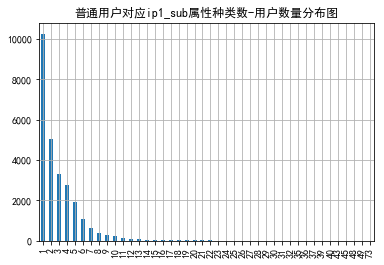

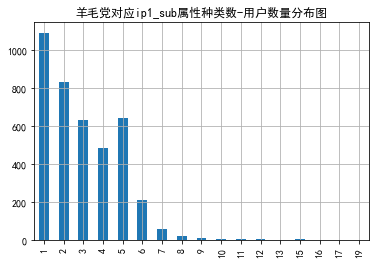

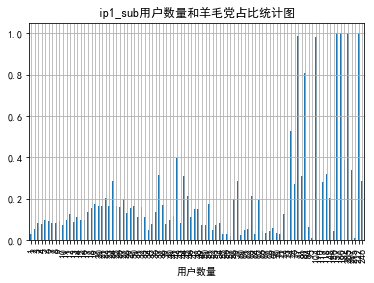

                  用户数量   羊毛党用户占比
ee2a277f07c7ac81   246  0.284553
72309d88abb9b916   222  1.000000
5e251ecd7ab23a78   215  0.009302
7661c9041bbe683c   207  0.338164
d212bf8069071714   205  1.000000
94e0916180e8fcea   182  0.390110
b8854c4e851ae095   160  1.000000
933cd147f9d087e5   157  1.000000
8393a8ab6d3d7a17   150  0.046667
d8883ffc88c699b4   148  0.202703
d99c9998872374a4   118  0.322034
c4120bd359792634   117  0.282051
5f0ef1c6d3d583a2   110  0.200000
d7833f8214e8019f   104  0.980769
bfa1418a13a13bd5    95  0.010526
42ef08ad5fe9ed51    94  0.063830
d734e1b1949cedbb    89  0.808989
cbc62c2b1cb7deb9    81  0.617284
7161ebbdb5712891    81  0.000000
879115727b3ae386    77  0.987013
dbd2277cad5cd392    76  0.539474
778209b9742a6b1e    76  0.000000
db6b37dff2c7047e    74  0.527027
9573a4f09d0ab8ce    73  0.000000
90379071c6730173    72  0.125000
a3ac2177e065a819    71  0.028169
6604929906b2c537    70  0.014286
77aa94e2b65e0d4e    70  0.000000
a7016b837a81beda    70  0.085714
1bdc61a760

In [39]:
one_one("ip1_sub")

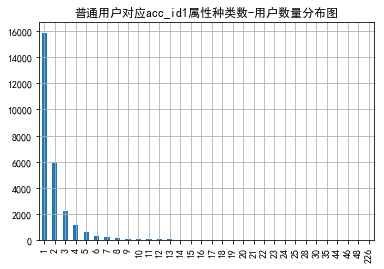

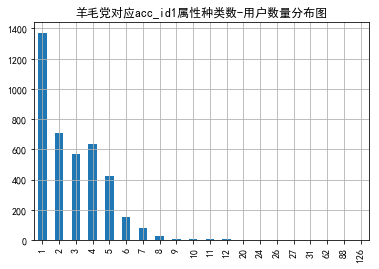

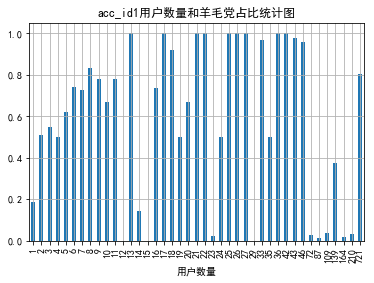

                  用户数量   羊毛党用户占比
9406757b48d5f991   721  0.805825
13906ec2487820ac   210  0.033333
eb35a21639adf712   164  0.018293
6cf3afe424fe055e   139  0.374101
fd0cf34ef6645196   109  0.036697
6216707ac13ed358    87  0.011494
7015ea1acb9e515d    72  0.027778
85c39c0582015d10    46  0.956522
d19f7a690659e16e    43  0.976744
926eb4660d9e0ba3    42  1.000000
0d6d02c30011dd51    36  1.000000
3b7a67c6903d1fa2    35  1.000000
4014e1822349668f    35  0.000000
a0bbdc8b74ae12dc    33  0.969697
46066b61598ec487    29  0.000000
67bdd7648d983fd7    27  1.000000
03d814e46fb41bef    26  1.000000
f87892178e6d61aa    25  1.000000
2fed00d7f75e4477    24  0.000000
077e5452fd15c063    24  1.000000
a3282894e41e18d5    23  0.000000
68e890f91f9df278    23  0.043478
53df5017e4ccb76b    22  1.000000
ec7e1ae329adb29f    21  1.000000
85759788f1530bdf    20  1.000000
45bf1933a76a65ec    20  0.000000
e4ee8596b50db426    20  1.000000
cd45b393a363fe77    19  0.000000
18af8fa8b778412e    19  1.000000
555ae36a8d

In [40]:
one_one("acc_id1")

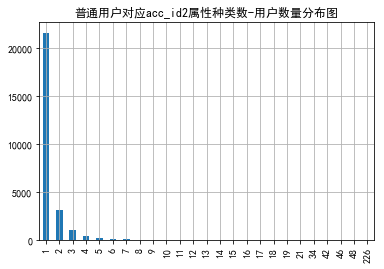

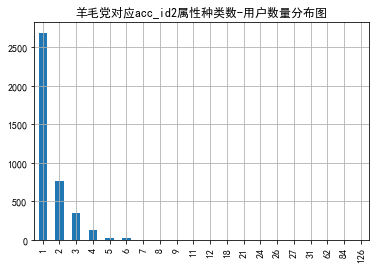

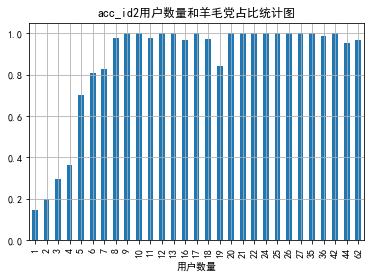

                  用户数量   羊毛党用户占比
201777a22491d5f7    62  0.967742
b77a683dea5cf512    44  0.954545
926eb4660d9e0ba3    42  1.000000
71dd3f681e2078bd    36  0.972222
268eab294ca14a7e    36  1.000000
ef6e62a246cde011    35  1.000000
d6ff89e3c747cea9    27  1.000000
03d814e46fb41bef    26  1.000000
f87892178e6d61aa    25  1.000000
420aa18ba22bf4b0    24  1.000000
e7a024b2f9bb2f69    22  1.000000
ec7e1ae329adb29f    21  1.000000
e2cabced488a86ad    20  1.000000
e4ee8596b50db426    20  1.000000
18af8fa8b778412e    19  1.000000
679f17e3082dabce    19  0.684211
555ae36a8d285235    18  1.000000
3fbe75632f7c8e44    18  1.000000
8b46a7d5ea696aac    18  0.888889
565a1898ecb249a6    18  1.000000
4695c0cdcbcecaf2    17  1.000000
3747c27c002d68d7    16  0.937500
c2e8dc9636e75e3d    16  1.000000
4789054774d962a6    13  1.000000
8c0b5aa4928c06aa    13  1.000000
f9c611e072bedef0    12  1.000000
0fb269fd597c8072    11  1.000000
29b9404356868ad7    11  1.000000
2b7db3609b8f7c50    11  1.000000
e341570547

In [37]:
one_one("acc_id2")

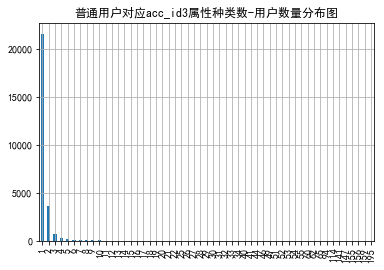

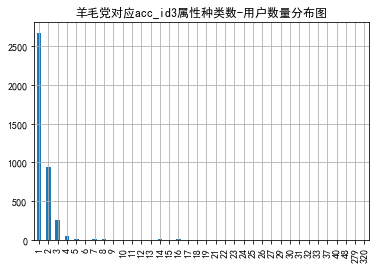

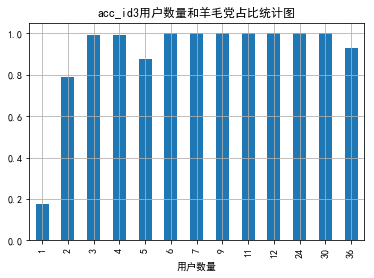

                  用户数量   羊毛党用户占比
b4d184e9a1313201    36  1.000000
78b2fccba70200f1    36  0.861111
a737170b4ba88181    30  1.000000
c34168e8d95641a0    24  1.000000
c9794aca4c87572c    12  1.000000
4b90510292351b77    11  1.000000
4695c0cdcbcecaf2     9  1.000000
dc70acef65bd347c     9  1.000000
5ca6a74699d245e9     9  1.000000
ed15d7d1d5981994     9  1.000000
fc6d2197db88dfef     7  1.000000
cc221d62dcdd330c     7  1.000000
6e5ac5190768d60d     7  1.000000
ed30d72a3deefcd1     7  1.000000
614a1c83df0ffdab     7  1.000000
ca7c58103e597645     6  1.000000
e6f8d6ab6f9f5ca7     6  1.000000
f87892178e6d61aa     6  1.000000
6ffb408c1a0a16a3     6  1.000000
74ec7a117fe89653     6  1.000000
14b919e6c1727cc3     6  1.000000
ceca7f76dce9e33f     6  1.000000
074ebb0da6d7a2dc     6  1.000000
202f04c36a2d6afe     5  1.000000
ebffa3c84924e3a0     5  1.000000
1cb016463456bb5f     5  0.800000
dc789cd977b903ed     5  1.000000
8031c41ba7c0728d     5  1.000000
be9aba212e0e96df     5  1.000000
5908569256

In [41]:
one_one("acc_id3")

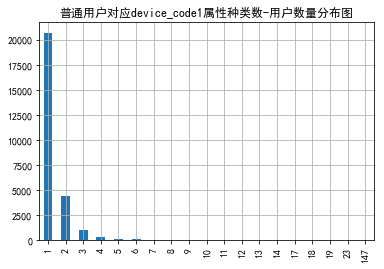

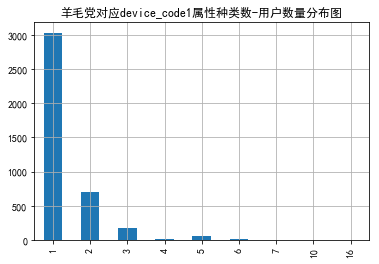

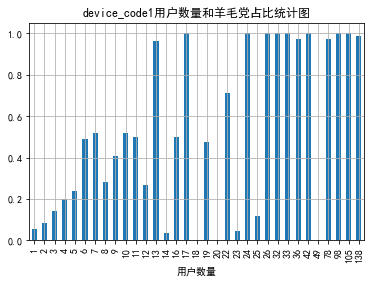

                  用户数量   羊毛党用户占比
c50faf7eba139d67   138  0.985507
b45da17fb4be8602   105  1.000000
c287cb22af3fb5d3    98  1.000000
144d7a1dfba19310    78  0.974359
68cab16ebab00a7f    49  0.000000
12beed7fa9e06b7f    42  1.000000
850a5ffc19a3380c    36  0.972222
1d81e6d820817708    33  1.000000
4ab1bf372599bb0a    33  1.000000
a6bc78acec7a5f0e    32  1.000000
05232e005d95e72b    26  1.000000
b9bf8250b5f8a819    25  0.120000
e223622f8e7ec4a2    24  1.000000
75414d9ee615a86f    23  0.043478
c9564c0bc84a9226    22  1.000000
4a5ca1ae90a750da    22  0.136364
f2f69ff99415c3e2    22  1.000000
333712c4ced1c5eb    20  0.000000
1104a97782d1c405    19  0.473684
503404927b455a33    18  0.000000
bdd35e27c0a21673    17  1.000000
d6cd86edf96c7895    16  1.000000
8e9e7619dfbcc00f    16  0.125000
8e10dd8c89e2c5b2    16  0.375000
efb07ff5e66bbfd7    14  0.071429
a271a6b89bb30657    14  0.000000
d0bf12dce49d13d8    13  1.000000
7574694256463383    13  0.923077
6c078eb5567abe41    12  0.000000
188f704c3b

In [42]:
one_one("device_code1")

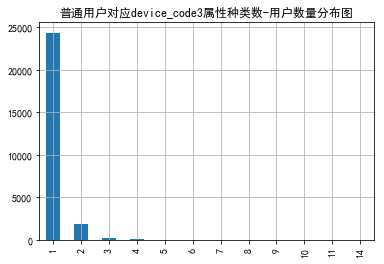

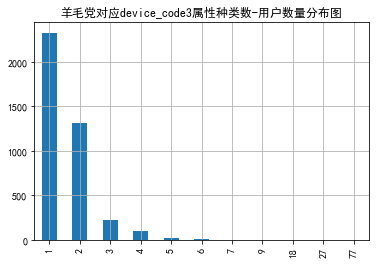

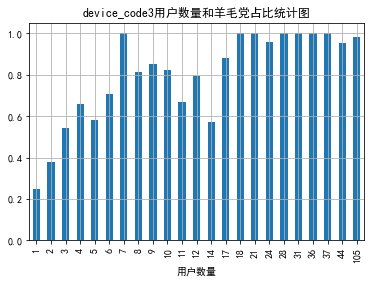

                  用户数量   羊毛党用户占比
b2788aa4727613a2   105  0.980952
a3cbae70db471980    44  0.954545
0d1884730db15ddc    37  1.000000
21121fedde146570    36  1.000000
d3ef4d2c9b76ff55    31  1.000000
a127a0905331fdf9    28  1.000000
4fbe3a01bb7eee70    24  0.958333
ccc2302f2c8902e0    21  1.000000
96f16ec42f95c067    18  1.000000
5168c88c936fbe7b    17  0.882353
160ce370a3c2ce76    14  0.571429
f461b8d28748f905    12  1.000000
a2ae68874761cf91    12  0.583333
ef25024503a1942b    11  1.000000
c836299d3986da06    11  1.000000
9aecd507ce2b80ac    11  0.000000
d0e8c6b12bfd5e35    10  0.300000
c5ace6a34318fc06    10  1.000000
c100f11a26c11d55    10  1.000000
f753b9d374091435    10  1.000000
71e0f21d2d4294a8     9  0.555556
f9e6d088687edb0c     9  1.000000
329f117805184d56     9  1.000000
31417f4b8dc449f6     8  1.000000
38c5ae9ef15c16cb     8  1.000000
ebe882de7003ef64     8  0.250000
481e43c7d5375ed4     8  0.000000
5190b89e9776bc34     8  1.000000
60ef7f0dfa0ffe49     8  1.000000
ca1f936032

In [43]:
one_one("device_code3")

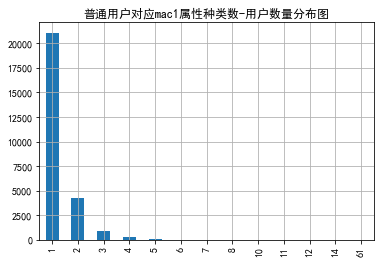

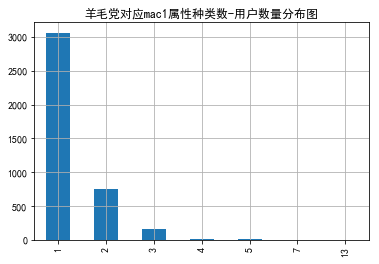

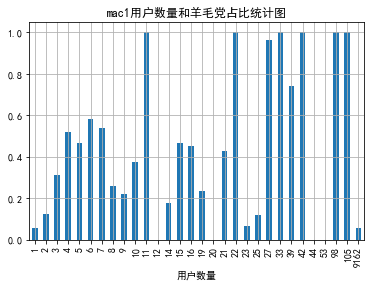

                  用户数量   羊毛党用户占比
a8dc52f65085212e  9162  0.057302
60aff111b0c942f0   105  1.000000
f064f972700598f4    98  1.000000
eae886a2b4f94b94    53  0.000000
e1e19ab6cce9ee3e    44  0.000000
5871d7687c5038eb    42  1.000000
291f3d4d6a0c0cc1    39  0.743590
9f37a0e0ba9f639b    33  1.000000
56a3b1678dd89e30    27  0.962963
48d6ef8000341c5d    25  0.120000
566150f86dc15a28    23  0.086957
3b7fef223f0b0025    23  0.043478
d9c956462582af29    22  1.000000
2939f98cfc8e1093    21  0.428571
635aba1d53ec6ba4    20  0.000000
de7aad82937c2164    19  0.473684
97feab6f8153cd84    19  0.000000
4e28a8fffb663ac3    16  0.375000
23cbf44f9368e43c    16  1.000000
f235c07461ba106d    16  0.125000
5a0ba922d8c85b2b    16  0.312500
e13fd04cd07a9783    15  0.933333
781972737f3ca3e5    15  0.000000
e0c698fdbbd7854c    14  0.285714
4ba6719c15b4e2f4    14  0.071429
04f292f7f4f179b6    12  0.000000
a57eb5609a4ab978    11  1.000000
107909cc8a420f80    10  0.100000
7a1488cff8a979be    10  0.000000
ce7f0f23af

In [44]:
one_one("mac1")

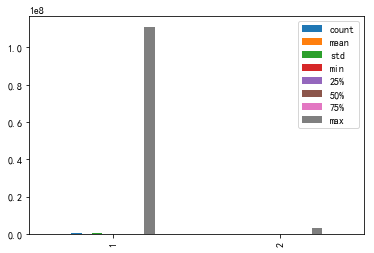

,1,2
count,2.196620e+05,4.496000e+04
mean,3.869712e+04,8.386504e+03
std,5.316919e+05,6.594288e+04
min,1.020000e+02,1.020000e+02
25%,1.459000e+03,1.020000e+02
50%,2.818000e+03,2.736000e+03
75%,5.264000e+03,2.818000e+03
max,1.110691e+08,2.990210e+06


In [46]:
#金钱处理
trans_amt_ana=pd.concat([train_tr[train_tr.Tag==0].trans_amt.describe(),train_tr[train_tr.Tag==1].trans_amt.describe()],axis=1)
trans_amt_ana.columns=["1","2"]
trans_amt_ana.astype("float").T.plot(kind='bar',stacked=False)
plt.show()
trans_amt_ana

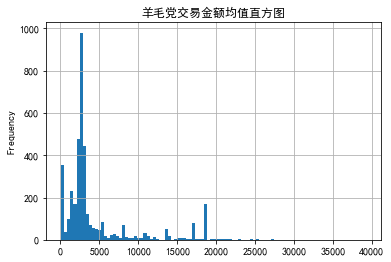

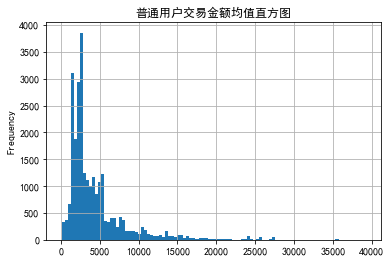

羊毛党交易金额小于10万的数量 43745
羊毛党数量 44960
全部用户交易金额小于10万的数量 247241
264622


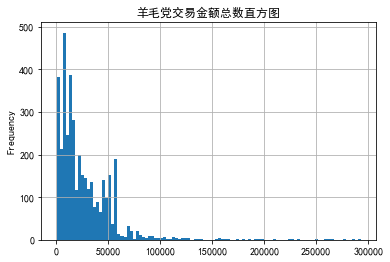

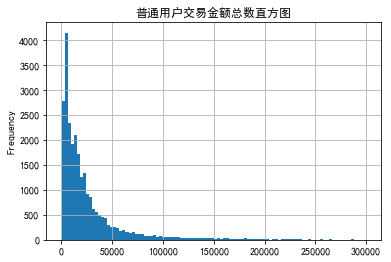

In [77]:
#对比每个人平均交易金额
key=40000
train_tr[(train_tr.Tag==1)&(train_tr.trans_amt<=key)].groupby("UID").trans_amt.mean().plot(kind='hist',bins=100,title='羊毛党交易金额均值直方图',grid=True)
#对比每个人交易总额
plt.show()
train_tr[(train_tr.Tag==0)&(train_tr.trans_amt<=key)].groupby("UID").trans_amt.mean().plot(kind='hist',bins=100,title='普通用户交易金额均值直方图',grid=True)
#对比每个人交易总额
plt.show()
train_tr.trans_amt.sort_values(ascending=False)
train_tr.trans_amt.describe().apply(lambda x:int(x))
print("羊毛党交易金额小于10万的数量",len(train_tr[(train_tr.Tag==1)&(train_tr.trans_amt<=key)]))
print("羊毛党数量",len(train_tr[(train_tr.Tag==1)]))
print("全部用户交易金额小于10万的数量",len(train_tr[(train_tr.trans_amt<=key)]))
print(len(train_tr))
key2=300000
tamt1=train_tr[(train_tr.Tag==1)&(train_tr.trans_amt<=key)].groupby("UID").trans_amt.sum()
tamt1[tamt1<key2].plot(kind='hist',bins=100,title='羊毛党交易金额总数直方图',grid=True)
#对比每个人交易总额
plt.show()
tamt2=train_tr[(train_tr.Tag==0)&(train_tr.trans_amt<=key)].groupby("UID").trans_amt.sum()
tamt2[tamt2<key2].plot(kind='hist',bins=100,title='普通用户交易金额总数直方图',grid=True)
#对比每个人交易总额
plt.show()

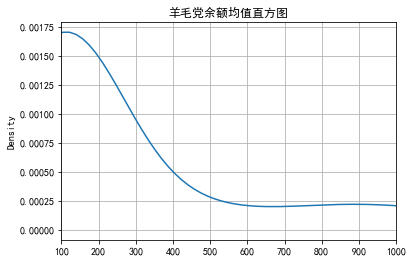

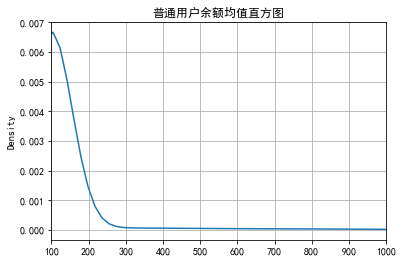

羊毛党余额小于10万的数量 40623
羊毛党数量 44960
全部用户余额小于10万的数量 246144
264622


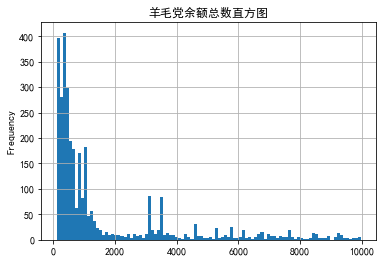

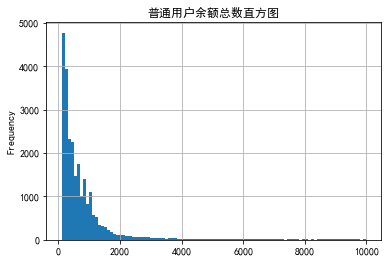

In [97]:
#对比每个人平均交易金额
key=10000
train_tr[(train_tr.Tag==1)&(train_tr.bal<=key)].groupby("UID").bal.mean().plot(kind='kde',xlim=(100,1000),title='羊毛党余额均值直方图',grid=True)
#对比每个人交易总额
plt.show()
train_tr[(train_tr.Tag==0)&(train_tr.bal<=key)].groupby("UID").bal.mean().plot(kind='kde',xlim=(100,1000),title='普通用户余额均值直方图',grid=True)
#对比每个人交易总额
plt.show()
train_tr.bal.sort_values(ascending=False)
train_tr.bal.describe().apply(lambda x:int(x))
print("羊毛党余额小于10万的数量",len(train_tr[(train_tr.Tag==1)&(train_tr.bal<=key)]))
print("羊毛党数量",len(train_tr[(train_tr.Tag==1)]))
print("全部用户余额小于10万的数量",len(train_tr[(train_tr.bal<=key)]))
print(len(train_tr))
key2=10000
tamt3=train_tr[(train_tr.Tag==1)&(train_tr.bal<=key)].groupby("UID").bal.sum()
tamt3[tamt3<key2].plot(kind='hist',bins=100,title='羊毛党余额总数直方图',grid=True)
#对比每个人交易总额
plt.show()
tamt4=train_tr[(train_tr.Tag==0)&(train_tr.bal<=key)].groupby("UID").bal.sum()
tamt4[tamt4<key2].plot(kind='hist',bins=100,title='普通用户余额总数直方图',grid=True)
#对比每个人交易总额
plt.show()